# Oemer - End-to-End OMR

Given a music score image, which can also be phone taken, this tool will parse and generate the result file in MusicXML format, which can be further edited easily with other tools such as Musescore.

In [34]:
#@title Setup

!add-apt-repository --yes ppa:mscore-ubuntu/mscore3-stable
!apt-get update
!apt-get --yes install musescore3 libmagic-dev cudnn9-cuda-12

!pip install git+https://github.com/BreezeWhite/oemer

%load_ext autoreload
%autoreload 2

Repository: 'deb https://ppa.launchpadcontent.net/mscore-ubuntu/mscore3-stable/ubuntu/ jammy main'
Description:
~~~~~~~~~ MUSESCORE 3 RELEASES FOR UBUNTU 18.04 AND LATER ~~~~~~~~~
Note that Canonical doesn’t allow new builds for releases marked obsolete
(any nōn-LTS predating the previous LTS (currently 24.04 “noble”), and any LTS
older than 7 years, currently anything before 14.04 “trusty”). The packages
for those older releases here can no longer be updated but still work, within
limitations. Best to upgrade to a supported release of the operating system!

INSTALLING: (run these commands from the terminal)
  sudo add-apt-repository ppa:mscore-ubuntu/mscore3-stable
  sudo apt-get update
  sudo apt-get install musescore3

DO *NOT* USE THESE PPAs on Debian, only on Ubuntu!

‣‣‣ These packages are NOT suitable for ”KDE neon 18.04 (bionic)”!
‣ Use https://build.opensuse.org/project/show/home:mirabile:mscore instead.
⚠ KDE neon 18.04 was discontinued so those packages can no longer be upda

Saving music3.png to music3.png


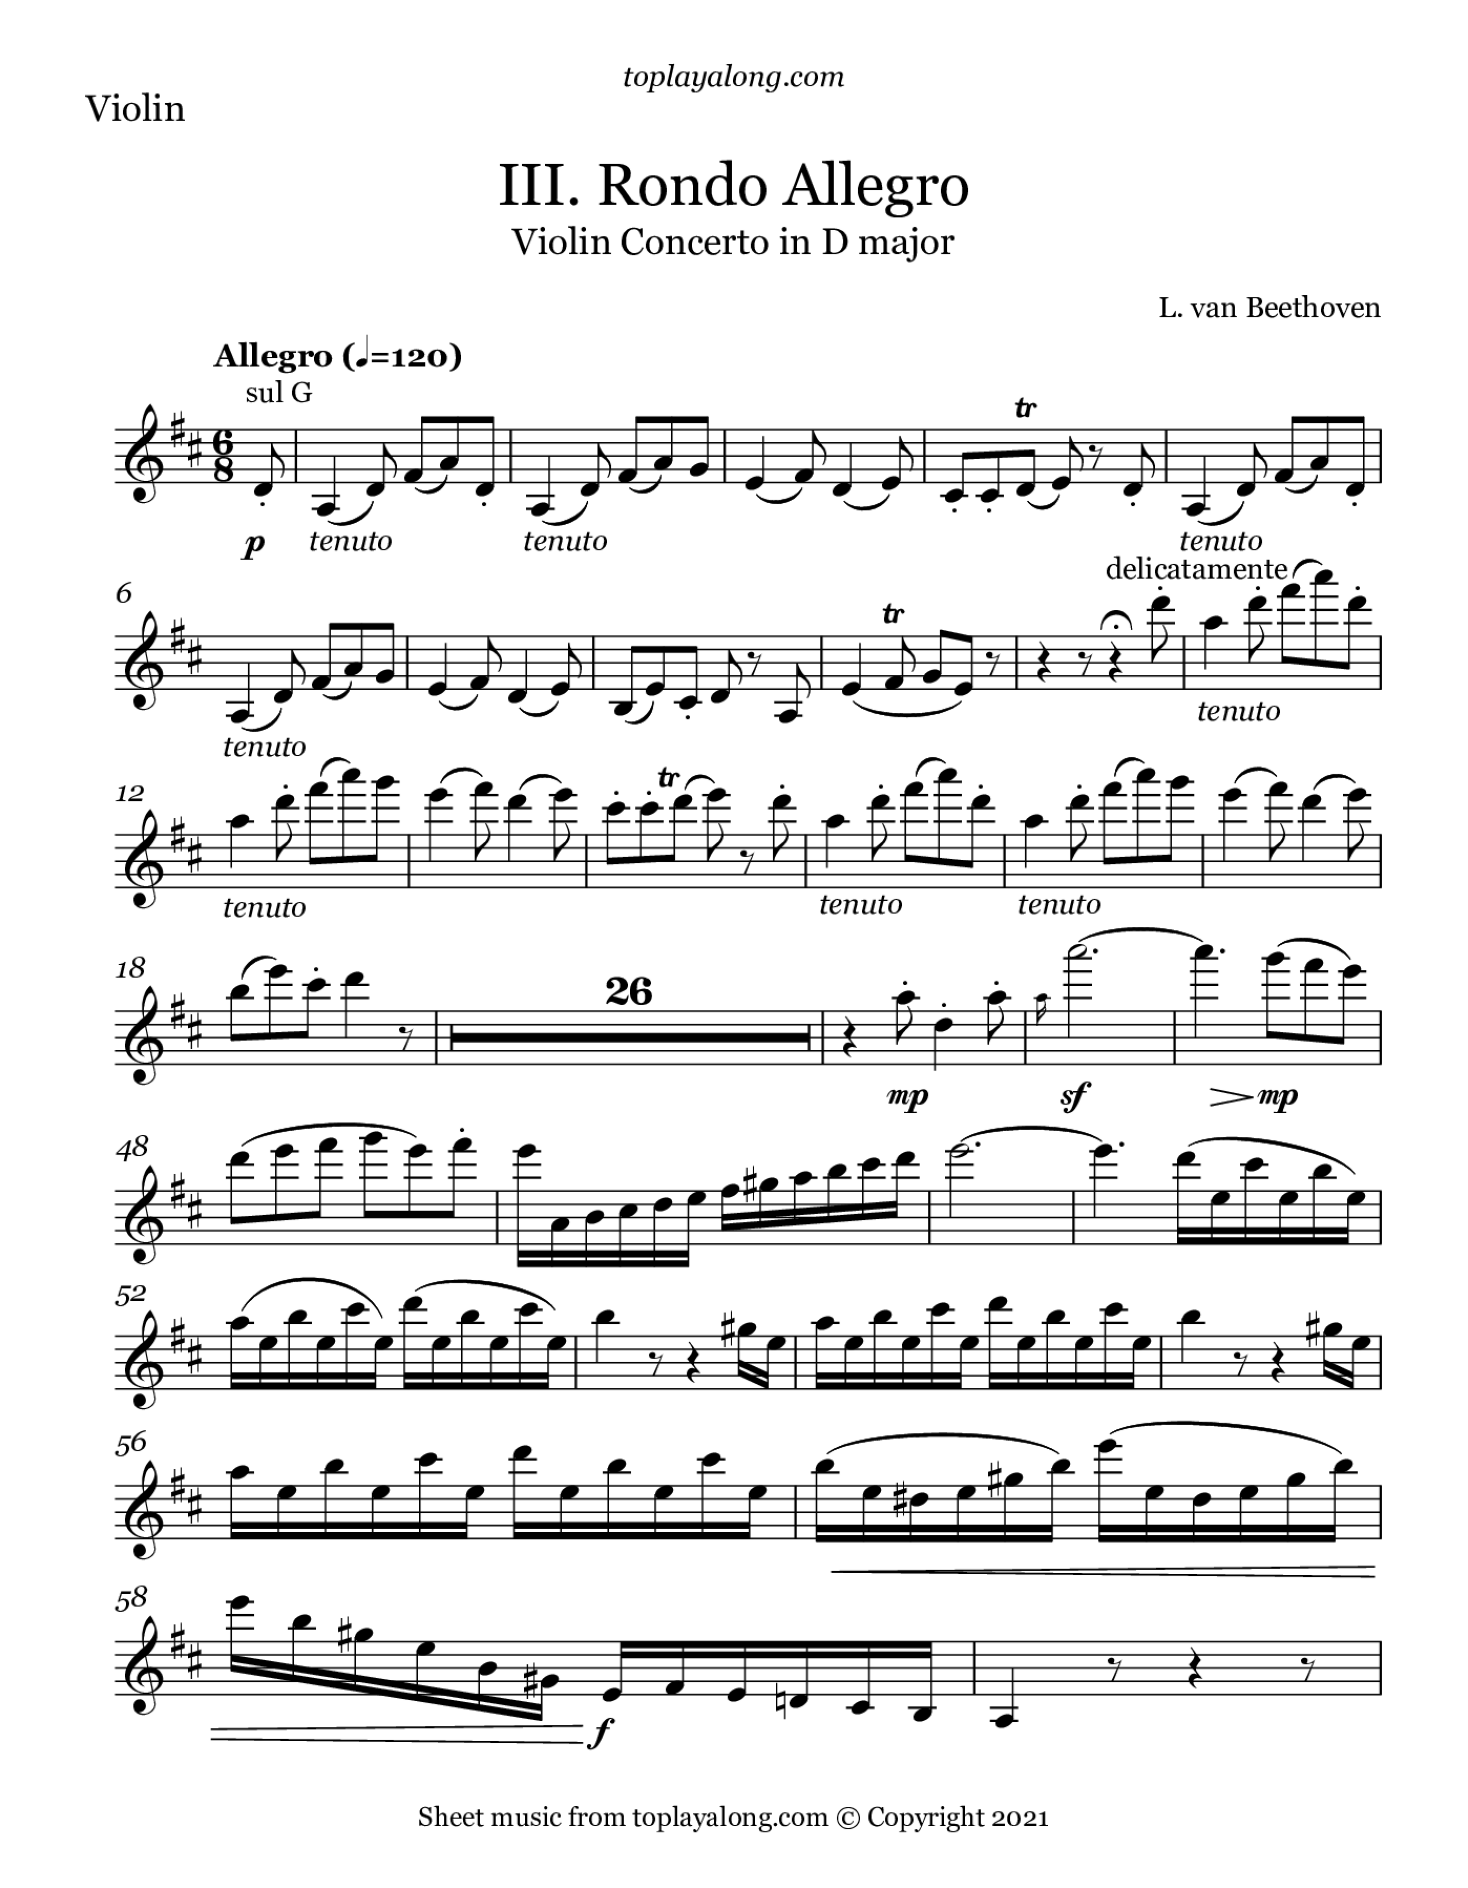

In [28]:
#@title Upload Image

%matplotlib inline

from google.colab import files
import matplotlib.pyplot as plt
import cv2
import os

ff = files.upload()
img_path = list(ff.keys())[0]
basename = img_path.replace(".jpg", "").replace(".png", "")

os.environ['img_path'] = img_path
os.environ['basename'] = basename

plt.rcParams['figure.figsize'] = (12, 12)
plt.axis('off')
img = cv2.imread(img_path)
plt.imshow(img)
plt.show()

In [27]:
!echo $img_path
!echo $basename

music6.png
music6


env: DEBIAN_FRONTEND=noninteractive
env: QT_QPA_PLATFORM=offscreen
2025-02-17 03:29:51 Extracting staffline and symbols
2025-02-17 03:29:51.989165014 [W:onnxruntime:, cuda_execution_provider.cc:2497 ConvTransposeNeedFallbackToCPU] Dropping the ConvTranspose node: ConvTranspose__19277 to CPU because it requires asymmetric padding which the CUDA EP currently does not support
2025-02-17 03:29:51.989210753 [W:onnxruntime:, cuda_execution_provider.cc:2629 GetCapability] CUDA kernel not supported. Fallback to CPU execution provider for Op type: ConvTranspose node name: ConvTranspose__19277
2025-02-17 03:29:51.989225635 [W:onnxruntime:, cuda_execution_provider.cc:2497 ConvTransposeNeedFallbackToCPU] Dropping the ConvTranspose node: model/conv2d_transpose_1/conv2d_transpose to CPU because it requires asymmetric padding which the CUDA EP currently does not support
2025-02-17 03:29:51.989236337 [W:onnxruntime:, cuda_execution_provider.cc:2629 GetCapability] CUDA kernel not supported. Fallback to

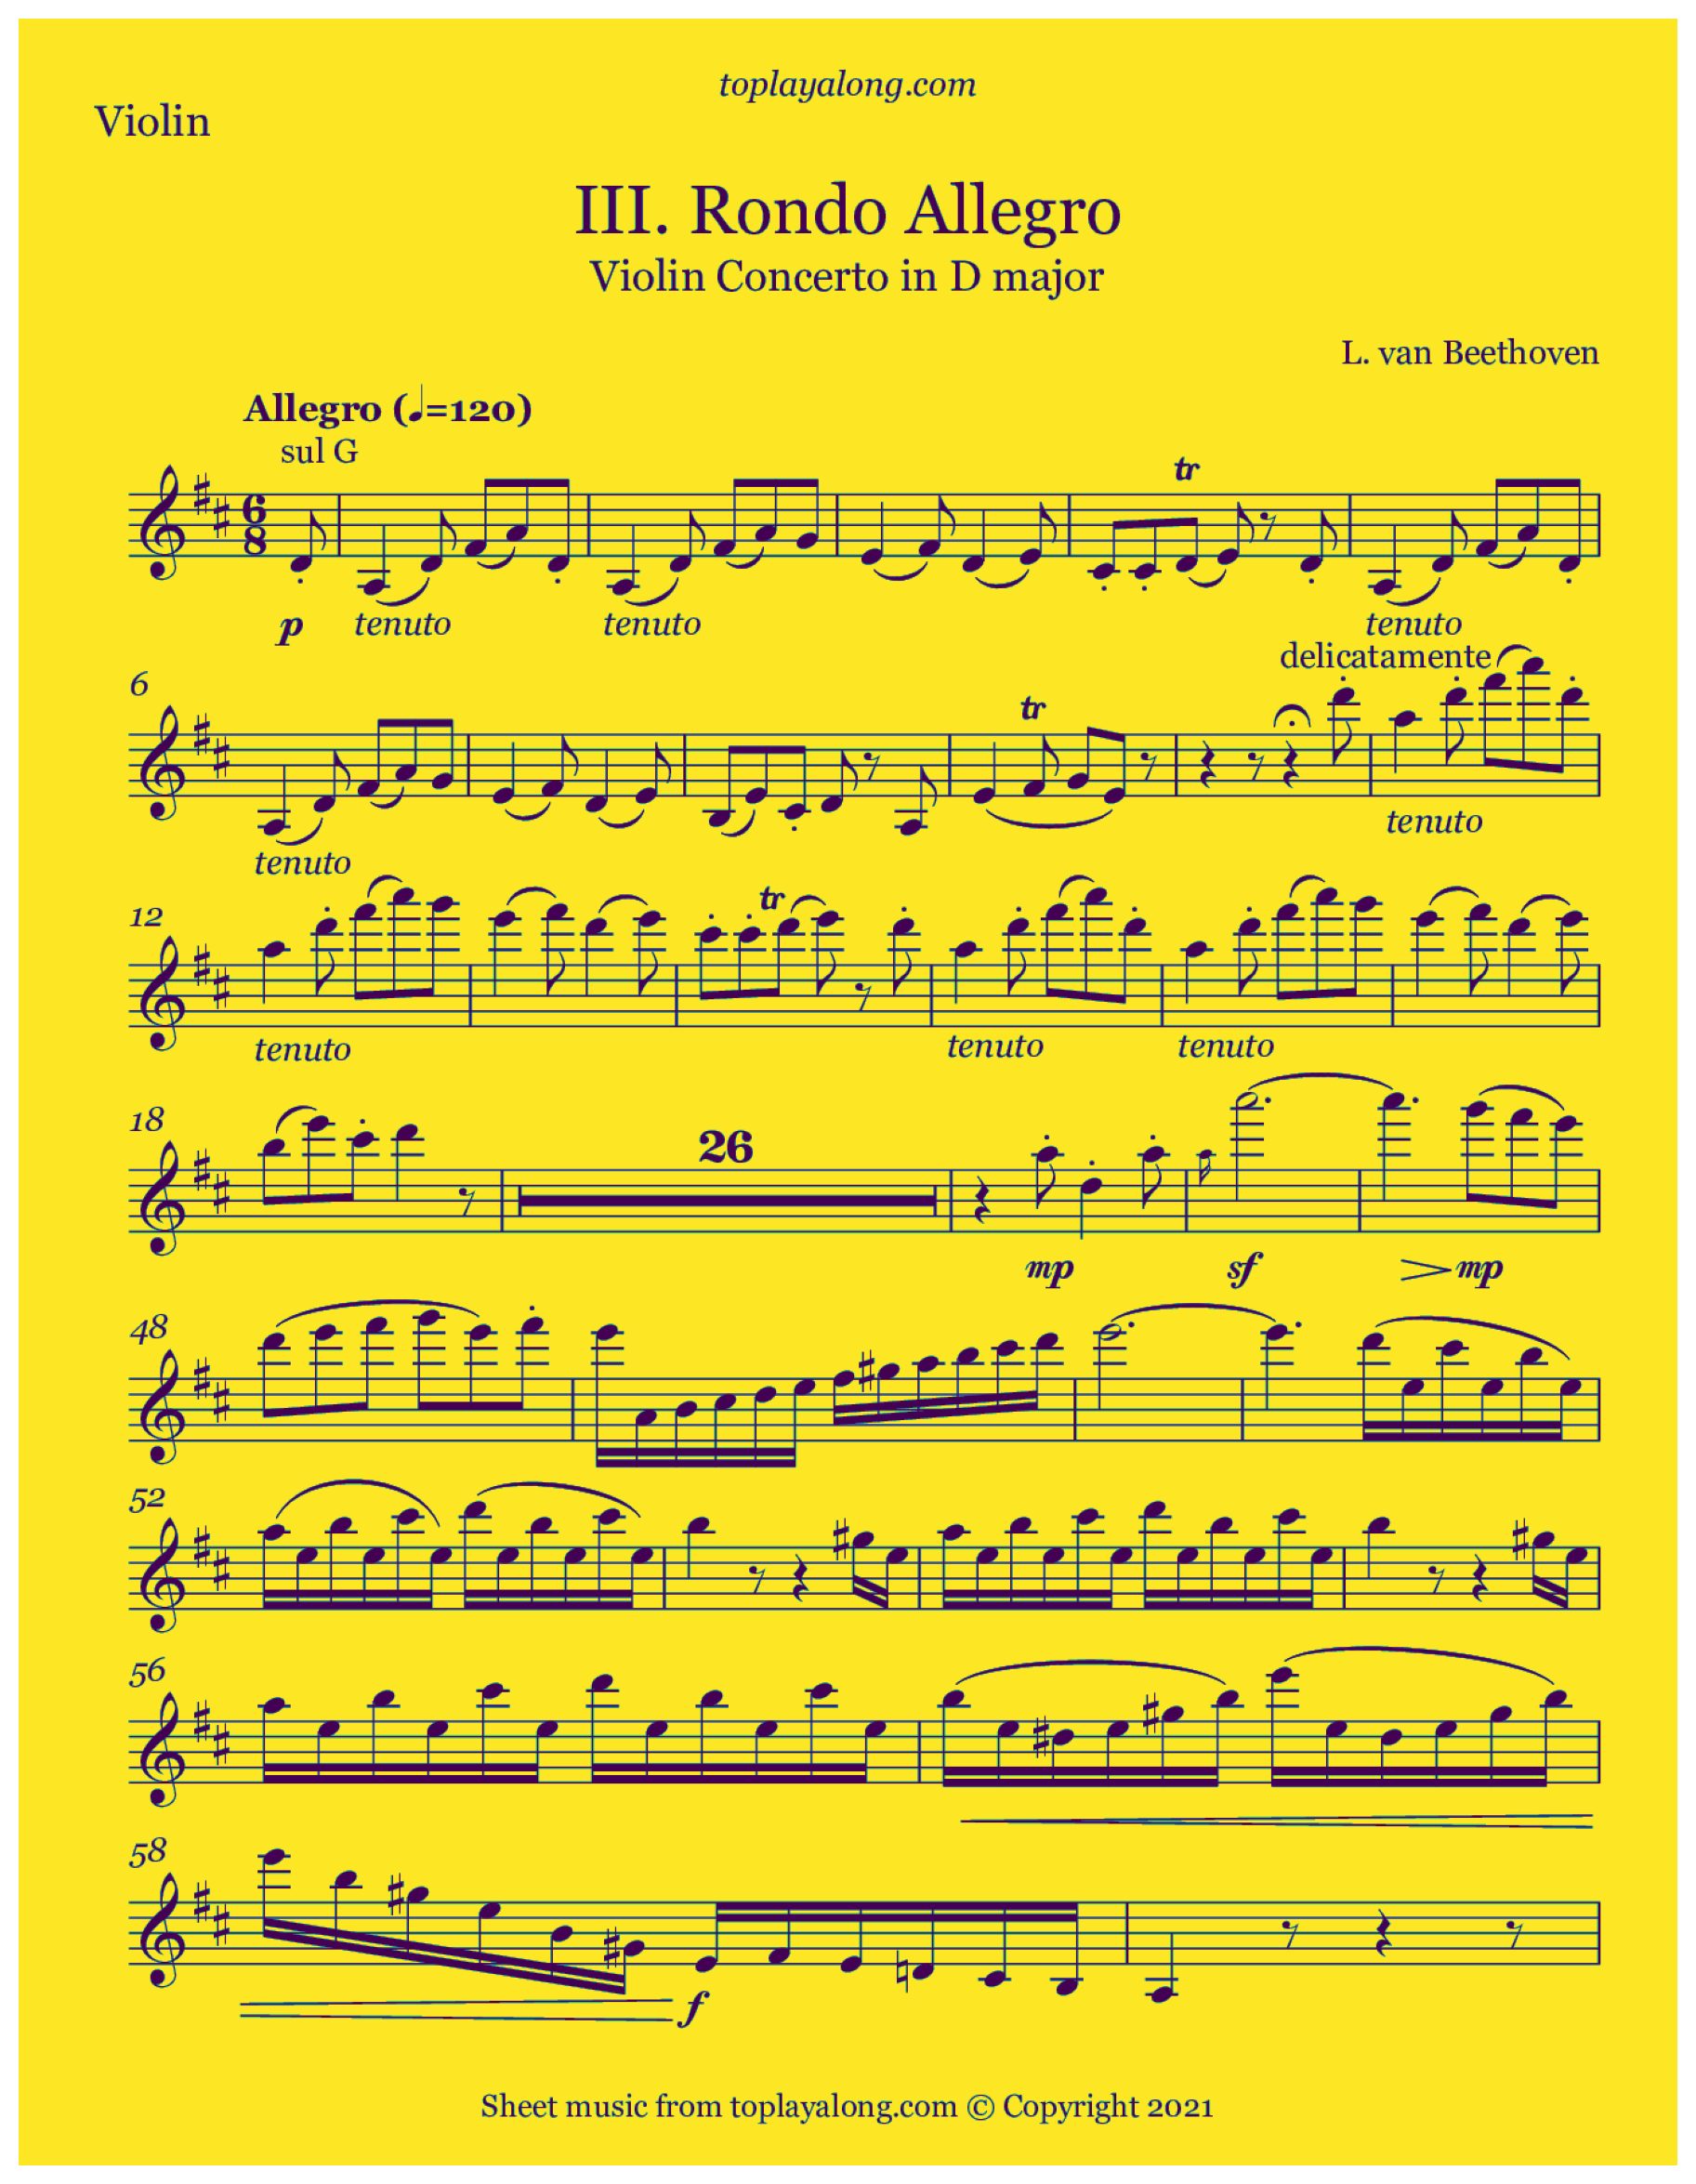

ValueError: could not convert string to float: 'music3.mp3'

In [29]:
#@title Run Recoginition

%env DEBIAN_FRONTEND=noninteractive
%env QT_QPA_PLATFORM=offscreen

import IPython.display as dsp

!oemer "$img_path"

!musescore3 -o "${basename}.mp3" $basename.musicxml
!musescore3 -o "${basename}.png" $basename.musicxml


img = plt.imread(f"{basename}.png")
plt.rcParams['figure.figsize'] = (15, 15)
plt.axis('off')
plt.imshow(img)
plt.show()

dsp.display(dsp.Audio(f"{basename}.mp3"))

In [31]:
import IPython.display as dsp
import librosa

# Load audio file and get the sample rate
audio_data, sample_rate = librosa.load(f"{basename}.mp3", sr=None)  # sr=None to use the native sample rate

# Display audio with the sample rate
dsp.display(dsp.Audio(data=audio_data, rate=sample_rate))

<ipython-input-31-6eace12a92af>:5: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sample_rate = librosa.load(f"{basename}.mp3", sr=None)  # sr=None to use the native sample rate
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: 'music3.mp3'

In [2]:
import xml.etree.ElementTree as ET

def replace_instrument(filename, output_filename):
    tree = ET.parse(filename)
    root = tree.getroot()

    # Define the new instrument details
    new_part_name = "Violin"
    new_instrument_name = "Violin"
    new_instrument_sound = "string.violin"
    new_midi_program = "41"  # General MIDI program number for Violin

    # Find and replace part name, instrument name, instrument sound, and midi-program
    for score_part in root.findall(".//score-part"):
        part_name_element = score_part.find("part-name")
        if part_name_element is not None and part_name_element.text == "Piano":
            part_name_element.text = new_part_name

        for score_instrument in score_part.findall("score-instrument"):
            instrument_name_element = score_instrument.find("instrument-name")
            instrument_sound_element = score_instrument.find("instrument-sound")
            if instrument_name_element is not None and instrument_name_element.text == "Piano":
                instrument_name_element.text = new_instrument_name
            if instrument_sound_element is not None and instrument_sound_element.text == "keyboard.piano":
                instrument_sound_element.text = new_instrument_sound

        for midi_instrument in score_part.findall("midi-instrument"):
            midi_program_element = midi_instrument.find("midi-program")
            if midi_program_element is not None and midi_program_element.text == "1":
                midi_program_element.text = new_midi_program

    # Write the modified content to a new file
    tree.write(output_filename, encoding="UTF-8", xml_declaration=True)

In [3]:
replace_instrument(f"{basename}.musicxml", f"{basename}_violin.musicxml")

NameError: name 'basename' is not defined